<a href="https://colab.research.google.com/github/Nithya153/devops/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Old car price prediction

##FLOW CHART



1. Importing libraries
2. Importing datasets
3. Preprocessing
4. Identifying and handling missing values
5. Visualization
6. Encoding categorical features to numerical
7. Splitting the data and Scaling
8. Model building

In [7]:
import pandas as pd
import numpy as np

In [6]:
file1 = pd.read_excel('/content/D2_file1.xlsx')

In [8]:
file2 = pd.read_excel('/content/D2_file2.xlsx')
file2.head(5)

,id,Make,Model,Year
0,1,Honda,Amaze 1.2 VX i-VTEC,2017
1,2,Maruti Suzuki,Swift DZire VDI,2014
2,3,Hyundai,i10 Magna 1.2 Kappa2,2011
3,4,Toyota,Glanza G,2019
4,5,Toyota,Innova 2.4 VX 7 STR [2016-2020],2018


In [9]:
file3 = pd.read_excel('/content/D2_file3.xlsx')
file3.head(5)

,id,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type
0,1,87150,Petrol,Manual,Pune,Grey,First,Corporate
1,2,75000,Diesel,Manual,Ludhiana,White,Second,Individual
2,3,67000,Petrol,Manual,Lucknow,Maroon,First,Individual
3,4,37500,Petrol,Manual,Mangalore,Red,First,Individual
4,5,69000,Diesel,Manual,Mumbai,Grey,First,Individual


In [10]:
file4 = pd.read_excel('/content/D2_target.xlsx')
file4.head(5)

,id,Price
0,1,505000
1,2,450000
2,3,220000
3,4,799000
4,5,1950000


In [11]:
file1

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...
2054,2055,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,2056,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,2057,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,2058,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [12]:
file1.isna().sum()

id                      0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [13]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2059 non-null   int64  
 1   Engine              1979 non-null   object 
 2   Max Power           1979 non-null   object 
 3   Max Torque          1979 non-null   object 
 4   Drivetrain          1923 non-null   object 
 5   Length              1995 non-null   float64
 6   Width               1995 non-null   float64
 7   Height              1995 non-null   float64
 8   Seating Capacity    1995 non-null   float64
 9   Fuel Tank Capacity  1946 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 161.0+ KB


In [14]:
file1.Drivetrain.nunique()

3

In [15]:
file1['Fuel Tank Capacity'].nunique()

55

In [16]:
df1 = pd.merge(file1,file2,on =['id'])

In [17]:
df2 = pd.merge(df1,file3,on =['id'])

In [18]:
df = pd.merge(df2,file4,on =['id'])

In [19]:
df.shape

(2059, 21)

In [20]:
df["Engine"].nunique()

108

In [21]:
df["Max Torque"].nunique()

290

In [22]:
df["Max Power"].nunique()

335

In [23]:
df["Fuel Tank Capacity"].nunique()

55

In [24]:
df["Seating Capacity"].nunique()

6

In [25]:
df.isna().sum()

id                      0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Price                   0
dtype: int64

In [26]:
df

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,...,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,...,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,...,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,...,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,...,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2055,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,...,XUV500 W8 [2015-2017],2016,90300,Diesel,Manual,Surat,White,First,Individual,850000
2055,2056,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,...,Eon D-Lite +,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,275000
2056,2057,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,...,Figo Duratec Petrol ZXI 1.2,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,240000
2057,2058,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,...,5-Series 520d Luxury Line [2017-2019],2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,4290000


In [27]:
df['Seating Capacity'] = df['Seating Capacity'].fillna(df['Seating Capacity'].median)
df['Fuel Tank Capacity'] = df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].median)

In [28]:
df['Engine'] = df['Engine'].fillna(df['Engine'].mode()[0])
df['Max Power'] = df['Max Power'].fillna(df['Max Power'].mode()[0])
df['Max Torque'] = df['Max Torque'].fillna(df['Max Torque'].mode()[0])

In [29]:
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Length'] = df['Length'].fillna(df['Length'].mean())
df['Width'] = df['Width'].fillna(df['Width'].mean())

In [30]:
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])

In [31]:
df.isna().sum()

id                    0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Price                 0
dtype: int64

In [32]:
df

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,...,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,...,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,...,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,...,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,...,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2055,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,...,XUV500 W8 [2015-2017],2016,90300,Diesel,Manual,Surat,White,First,Individual,850000
2055,2056,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,...,Eon D-Lite +,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,275000
2056,2057,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,...,Figo Duratec Petrol ZXI 1.2,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,240000
2057,2058,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,...,5-Series 520d Luxury Line [2017-2019],2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,4290000


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

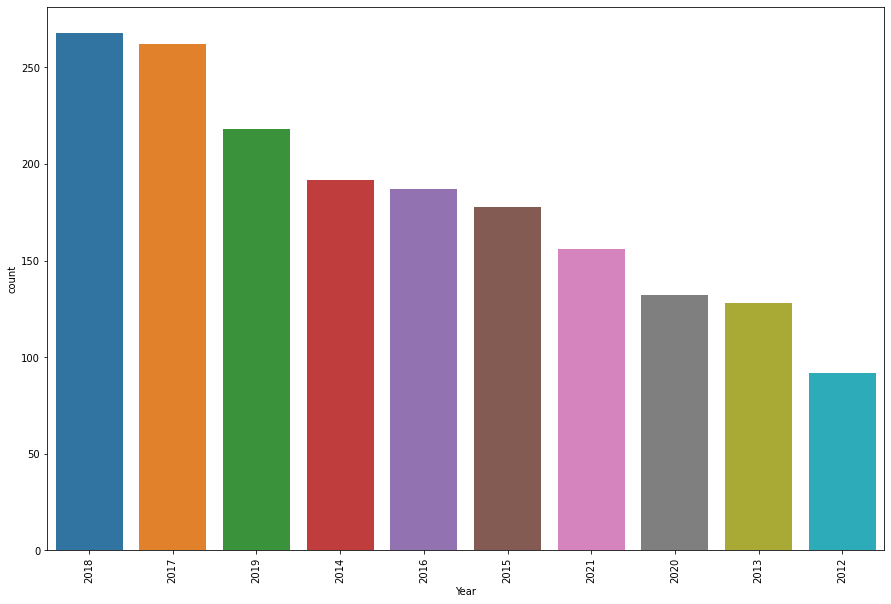

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Year',data=df, ax = ax, order = df['Year'].value_counts().iloc[:10].index)

2018 model is sold more

<AxesSubplot:>

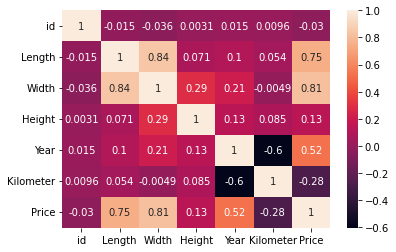

In [35]:
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True)

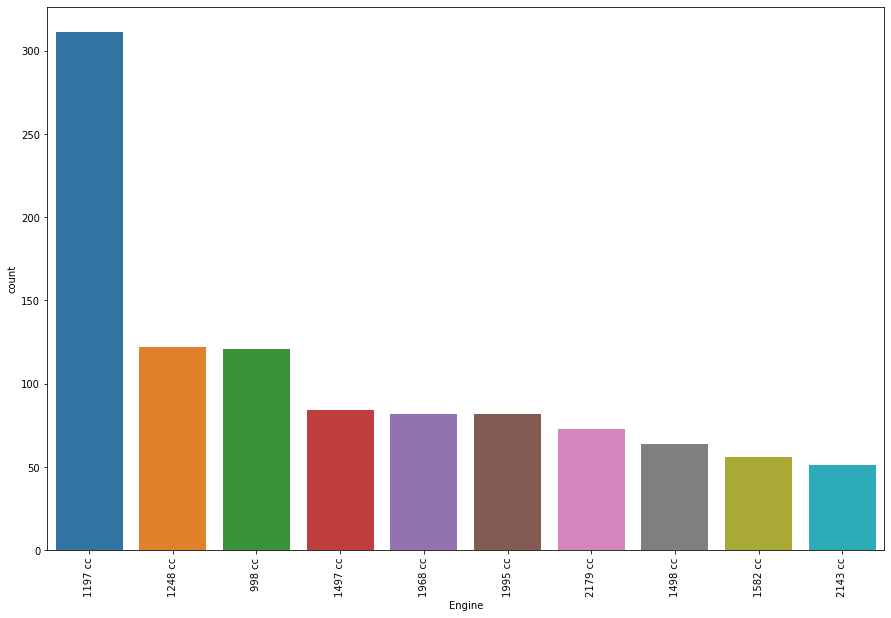

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Engine',data=df, ax = ax, order = df['Engine'].value_counts().iloc[:10].index)

engine with 1197 cc sold more

In [37]:
df["Max Power"] = df["Max Power"].str.split("@").str[0]
df["Max Torque"] = df["Max Torque"].str.split("@").str[0]
df["Model"] = df["Model"].str.split(" ").str[0]

In [38]:
df["Engine"] = df["Engine"].str.strip(" cc").astype(float)
df["Max Power"] = df["Max Power"].str.strip(" bhp").astype(float)
df["Max Torque"] = df["Max Torque"].str.strip(" Nm").astype(float)

In [39]:
df = df.drop(['id', 'Length', 'Width', 'Height','Color','Location'],axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])
df['Owner'] = le.fit_transform(df['Owner'])
df['Drivetrain'] = le.fit_transform(df['Drivetrain'])

In [42]:
df.head()

,Engine,Max Power,Max Torque,Drivetrain,Seating Capacity,Fuel Tank Capacity,Make,Model,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Price
0,1198.0,87.0,109.0000,1,5.0,35.0,Honda,Amaze,2017,87150,6,1,1,Corporate,505000
1,1248.0,74.0,190.0000,1,5.0,42.0,Maruti Suzuki,Swift,2014,75000,2,1,3,Individual,450000
2,1197.0,79.0,112.7619,1,5.0,35.0,Hyundai,i10,2011,67000,6,1,1,Individual,220000
3,1197.0,82.0,113.0000,1,5.0,37.0,Toyota,Glanza,2019,37500,6,1,1,Individual,799000
4,2393.0,148.0,343.0000,2,7.0,55.0,Toyota,Innova,2018,69000,2,1,1,Individual,1950000


1. color map ranges from yellow (low values) to green (medium values) to blue (high values)
2. color map for visualizing of continuous data

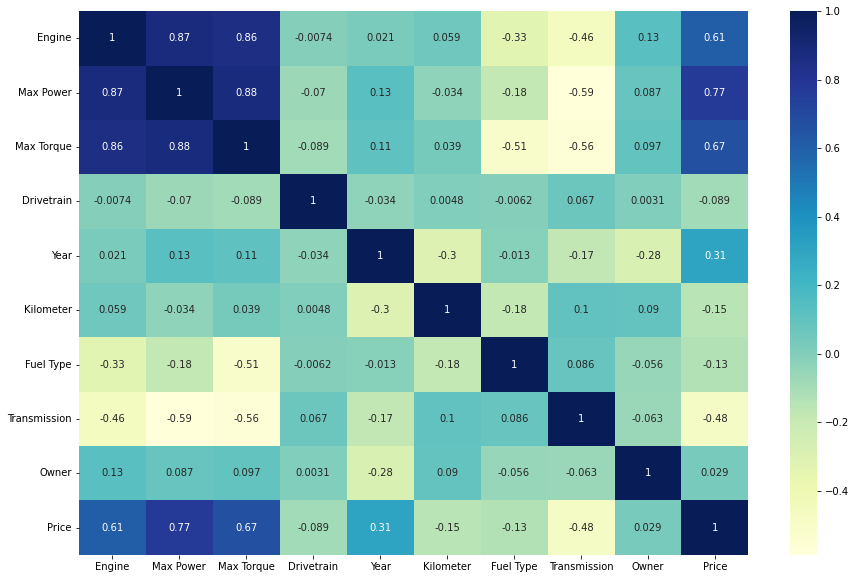

In [43]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

engine and max power and max torque are correlated 

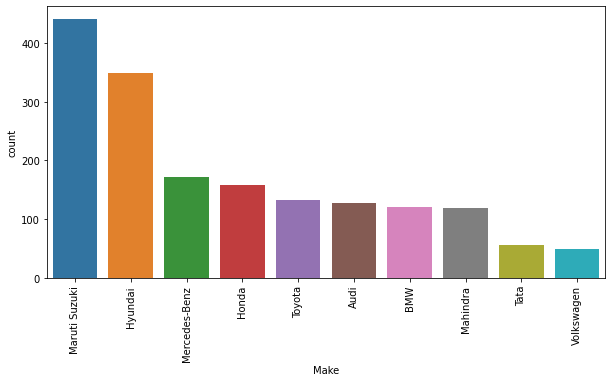

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Make',data = df, ax = ax, order = df['Make'].value_counts().iloc[:10].index)

### Maruti suzuki was sold most

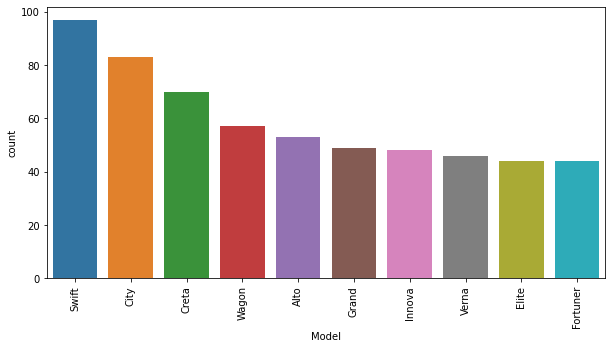

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Model',data=df, ax = ax, order = df['Model'].value_counts().iloc[:10].index)

### Swift sold many times

In [46]:
data=pd.get_dummies(df,drop_first=True)

In [47]:
X=data.drop(['Price'],axis = 1)
y=data['Price']
X.head()

,Engine,Max Power,Max Torque,Drivetrain,Year,Kilometer,Fuel Type,Transmission,Owner,Seating Capacity_7.0,...,Model_Xcent,Model_Xylo,Model_Yaris,Model_ZS,Model_Zen,Model_Zest,Model_i10,Model_i20,Seller Type_Corporate,Seller Type_Individual
0,1198.0,87.0,109.0000,1,2017,87150,6,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1248.0,74.0,190.0000,1,2014,75000,2,1,3,0,...,0,0,0,0,0,0,0,0,0,1
2,1197.0,79.0,112.7619,1,2011,67000,6,1,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1197.0,82.0,113.0000,1,2019,37500,6,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2393.0,148.0,343.0000,2,2018,69000,2,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [52]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.001)

In [53]:
model = model.fit(X_train, y_train)

In [54]:
y_pred = model.predict(X_test)

In [55]:
from sklearn import metrics
print('Ridge_Regression')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred)*100))
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))


Ridge_Regression
r2_score 68.30
Adjusted_r2_score 24.22
MAE: 555264.59


In [56]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      
# Driver code
  
def main() :
      
    
    # Model training    
    model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 0.01 )
    model.fit( X_train, y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    

      
   
      
if __name__ == "__main__" : 
    main()

In [57]:
model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.1, l2_penality = 0.01)
model.fit( X_train, y_train )

In [58]:
Y_pred = model.predict( X_test )

In [59]:

r2 = 1 - np.sum((y_test - Y_pred)**2) / np.sum((y_test -np.mean(y_test))**2)
mae = np.sum(np.abs(y_test - Y_pred))/len(y_test)


print("R-squared:", r2*100)
print("MAE:", mae)

R-squared: 67.35566295672555
MAE: 551307.8653310366


In [60]:
def main() :  
      
    # Model training    
    max_accuracy = 0
      
    # learning_rate choices    
    learning_rates = [ 0.1, 0.2, 0.3, 0.4, 0.5, 
                      0.01, 0.02, 0.03, 0.04, 0.05]
      
    # iterations choices    
    iterations = [ 100, 200, 300, 400, 500 ]

    #l2 penalty
    l2_penality = [0.1,1,10,100,0.01,0.001]
    
      
    # available combination of learning_rate and iterations
      
    parameters = []    
    for i in learning_rates :        
        for j in iterations :
          for l in l2_penality :         
            parameters.append( ( i, j, l ) )
              
    #print("Available combinations : ",  parameters )
              
    # Applying linear searching in list of available combination
    # to achieved maximum accuracy on CV set
      
    for k in range( len( parameters ) ) :        
        model = RidgeRegression( learning_rate = parameters[k][0], 
                                iterations = parameters[k][1], l2_penality = parameters[k][2] )
      
        model.fit( X_train, y_train )
        
        # Prediction on validation set
        Y_pred = model.predict( X_test )
       

              
        # counter    
        count = 0
      
    mse = np.mean((Y_pred - y_test)**2)
    r2 = 1 - np.sum((y_test - Y_pred)**2) / np.sum((y_test -np.mean(y_test))**2)
    mae = np.sum(np.abs(y_test - Y_pred))/len(y_test)


              
    print("MSE:", mse)
    print("R-squared:", r2*100) 
    print("MAE:", mae)

if __name__ == "__main__" :     
    main()

<ipython-input-56-f7b55945b5b9>:34: RuntimeWarning: overflow encountered in multiply
  dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +


MSE: 2031807579149.396
R-squared: 65.11111814620864
MAE: 550414.6741696064


In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:


ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.21953e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.28195e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.06143e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.09223e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [63]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-1297640216923.7754
